# **Attack on Titan Final Season Reviews - Tugas VisDat 8 : Text Visualization**

Nama : Kurniadi Ahmad Wijaya

NIM : 1301194024

Kelas : IF-42-GAB02 / IF-43-09  

## **Introduction**


<img src="https://www.viu.com/ott/id/articles/wp-content/uploads/2020/12/Attack-on-Titan_Slide-Banner.jpg" width=600>

img src : <a src="https://www.viu.com/ott/id/articles/wp-content/uploads/2020/12/Attack-on-Titan_Slide-Banner.jpg">viu </a>

Attack on Titan atau juga dikenal dengan Shingeki no Kyojin merupakan seri populer yang ditulis oleh Hajime Isayama. Seri anime dari Attack on Titan memasuki season terakhirnya dengan judul: Attack on Titan: Final Season, yang rilis pada 7 Desember 2020 lalu. Dengan menampilkan animasi visual serta alur cerita yang cukup berbeda dengan season-season sebelumnya, serial Attack on Titan : Final Season banyak diberikan kritik dan pujian baik oleh fans maupun para kritikus. Bahkan anime ini sempat menjadi trending mingguan di twitter karena memiliki element of surprise tersendiri di setiap episode mingguannya. 

<img src="https://pbs.twimg.com/media/EZL1xT8U4AE-Kai.jpg" width="500">

Salah satu sumber atau situs review yang paling sering digunakan untuk melakukan review anime adalah situs <a href="https://myanimelist.net/">MyAnimeList</a>. Pada tugas ini akan digunakan keseluruhan review terkait anime attack on titan yang tersedia pada situs MyAnimeList. 

## **Import Library**


In [60]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import requests

from PIL import Image
from wordcloud import WordCloud
from tqdm import tqdm

mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
mpl.style.use(['ggplot'])

warnings.filterwarnings('ignore')

## **Data Crawling**

- Base Review Sites : <a href="https://myanimelist.net/anime/40028/Shingeki_no_Kyojin__The_Final_Season/reviews">https://myanimelist.net/anime/40028/Shingeki_no_Kyojin__The_Final_Season/reviews</a>

- Jikan MyAnimeList API Documentation : <a href="https://jikan.docs.apiary.io/">https://jikan.docs.apiary.io/</a>

Proses crawling untuk mendapatkan dataset review pada situs <a href="https://myanimelist.net/">MyAnimeList</a> dilakukan dengan menggunakan API Unoficiall milik Jikan. Hal ini dilakukan karena untuk mendapatkan akses ke API MyAnimeList membutuhkan waktu yang cukup lama untuk approval. Basis dasar link yang digunakan untuk API ini adalah https://api.jikan.moe/v3/anime/{id_anime}/reviews/{page}.

Contoh penggunaan : <a href="https://api.jikan.moe/v3/anime/40028/reviews/0">https://api.jikan.moe/v3/anime/40028/reviews/0</a>. Selanjutnya parameter page akan dilakukan perulangan dari 0 - 19 untuk mendapatkan keseluruhan review dataset. 

In [61]:
reviews = []

for i in tqdm(range(0, 20)):
    result = requests.get(f'https://api.jikan.moe/v3/anime/40028/reviews/{i}')
    review = result.json().get('reviews')

    for j in range(len(review)):
        reviews.append([review[j].get('content'), review[j].get('date'), review[j].get('reviewer').get('scores').get('overall')])

100%|██████████| 20/20 [00:34<00:00,  1.73s/it]


In [62]:
# Membuat Dataframe dari dataset yang telah di crawl
df = pd.DataFrame(data=reviews, columns={
    'text': reviews[0],
    'created_at': reviews[1],
    'overall_score': reviews[2]}
)

# Memanggil Dataset dari csv
# df = pd.read_csv('aot-reviews-end.csv')

print(f'Total Data Review : {len(df)}')

df.to_csv('aot-reviews-end.csv', index=False)
df.sample(8)

Total Data Review : 390


,text,created_at,overall_score
269,I found the final season to be a let down. Ove...,2021-06-02T10:48:00+00:00,7
325,"For a story to be a masterpiece, I think it ha...",2021-02-09T11:18:00+00:00,10
20,*This review is now updated for all 16 episode...,2020-12-27T07:13:00+00:00,9
84,Disclaimer: I'll rant a bit about the low IQed...,2021-01-29T05:12:00+00:00,10
211,I am shocked by the 'controversy' that this se...,2021-03-30T20:52:00+00:00,10
62,So recently my review got taken down for fair ...,2021-02-18T17:58:00+00:00,6
246,(Spoilers for the first three seasons of Attac...,2021-01-18T19:09:00+00:00,9
36,Do you remember the last time you saw such a b...,2021-03-28T08:27:00+00:00,9


In [63]:
# Inisialisasi Set Untuk Key Kata Dan Value Jumlah Kata
word = {}

# Perulangan Setiap Kata Dan Perhitungannya Dalam Sebuah Dataframe
# Untuk Dimasukkan Kedalam Set
for i in range(len(df)):
    temp_text = df.loc[i]['text']
    temp_split = temp_text.split(' ')
    temp_set = list(set(temp_split))

    for j in range(len(temp_set)):
      try:
        word[temp_set[j]] += 1
      except:
        word[temp_set[j]] = 1

print(f'Total Character : {len(word)}')

Total Character : 20972


## **Data Preprocessing**

### **Menghapus Data Duplikat**

In [64]:
df.drop_duplicates(subset='text', inplace=True)
df.reset_index(inplace=True)

print(f'Total Data Sisa Penghapusan Duplikasi: {len(df)}')

Total Data Sisa Penghapusan Duplikasi: 369


### **Data Cleansing** 

- Dokumentasi Library NLTK : <a href='https://www.nltk.org/api/nltk.html'>https://www.nltk.org/api/nltk.html</a> 
- Dokumentasi Library Preprocessor : <a href='https://github.com/s/preprocessor'>https://github.com/s/preprocessor</a> 
- Dokumentasi Library SymSpell : <a href='https://github.com/s/preprocessor'>https://github.com/s/preprocessor</a> 

In [65]:
import re
import string
import nltk
import pkg_resources
import preprocessor as p

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from symspellpy.symspellpy import SymSpell

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ShinyQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ShinyQ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ShinyQ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def tokenizing(text):
    # Mengubah setiap kata menjadi lowercase
    text =  text.lower()

    # Menghapus Link Dengan Pattern http/https dan www
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)

    # Menghapus Tag HTML
    text = re.sub('<.*?>', '', text)

    # Menghapus Tanda Baca Seperti Titik Dan Koma
    text = text.translate(str.maketrans(' ', ' ', string.punctuation))

    # Menghapus Karakter Selain Huruf a-z dan A-Z
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Mengganti baris baru (enter) dengan spasi
    text = re.sub("\n", " ", text)

    # Menghapus Karakter Berulang (Contoh: Horeeee!!!! menjadi Hore!)
    text = re.sub(r'(\w)(\1{2,})', r"\1", text)

    # Menghapus 1 Karakter Terpisah
    text = re.sub(r"\b[a-zA-Z]\b", "", text)

    # Menghapus Spasi Yang Lebih Dari Satu
    text = re.sub('(s{2,})', ' ', text)

    # Mengembalikan Hasil Tokenizing Text
    return text


# Memisahkan Kata Singkatan (Abbreviaton). Contoh won't -> will not 
def decontracted(text):
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    return text


# Lematisasi adalah teknik  untuk mereduksi kata menjadi Lemma atau bentuk dasar dari sebuah kata
# Contoh:  better -> good
def lemmatizing_text(text):
    final_text = ''
    words = word_tokenize(text)

    for w in words:
        final_text += lemmatizer.lemmatize(w) + ' '

    return final_text
        

# Menghapus kata yang mengandung judul topik dan kata yang terdapat pada stopwords nltk 
def filtering_text(text):
    custom_word = ['season', 'attack', 'titan']
    temp_text_split = []
    text_split = text.split(' ')

    for i in range(len(text_split)):
        if text_split[i] not in stop_words and len(text_split[i]) > 3 and text_split[i] not in custom_word:
            temp_text_split.append(text_split[i])
    
    temp_text_split = list(set(temp_text_split))
    final_text = ' '.join(temp_text_split)
    
    return final_text


# Word Segment melakukan pemisahan kata-kata yang tergabung. Contoh : ihateit -> i hate it
def word_segment(text):
    sym_spell = SymSpell(max_dictionary_edit_distance=0, prefix_length=7)
    dictionary_path = pkg_resources.resource_filename("symspellpy", "frequency_dictionary_en_82_765.txt")

    sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)
    result = sym_spell.word_segmentation(text)

    return result.corrected_string


# Tambahan pembersihan dengan library tweet preprocessor
def tweet_preprocessor(text):
    return p.clean(text)  


# Proses data cleansing setiap text
df['text'] = df['text'].apply(word_segment)
df['text'] = df['text'].apply(decontracted)
df['text'] = df['text'].apply(tokenizing)
df['text'] = df['text'].apply(filtering_text)
df['text'] = df['text'].apply(lemmatizing_text)
df['text'] = df['text'].apply(tweet_preprocessor)

### **Contoh Hasil Preprocessing Data**

In [67]:
df['text'].sample(1).values[0]

'child better given make theme considered girl still watching think although dubbed like design matured free show record underlying fantastic really gotten star cheap season anime obviously comparison drop character paused screw kaji time show planet kill fall simply whole home trying slightly ash worth none style written fire wanted ridiculous many biggest grown jaeger year sand enjoyed ignore right advocating presumably animation primarily cloud watch story deeper something could niccolo look lifetime frame feel sound combined video gon na four fattest visuals good also counter track background grace horse even explained branching quality bash hard impre steaming boom epic excrement three going change still completely fortune past acting drawn freedom complex main sorry euthanasia notice music severe specifically noticed track wish much sure spoiler said studio voice mankind cool god move subbed pile plan sake help'

## **Explorasi Data**

### **Word Cloud**

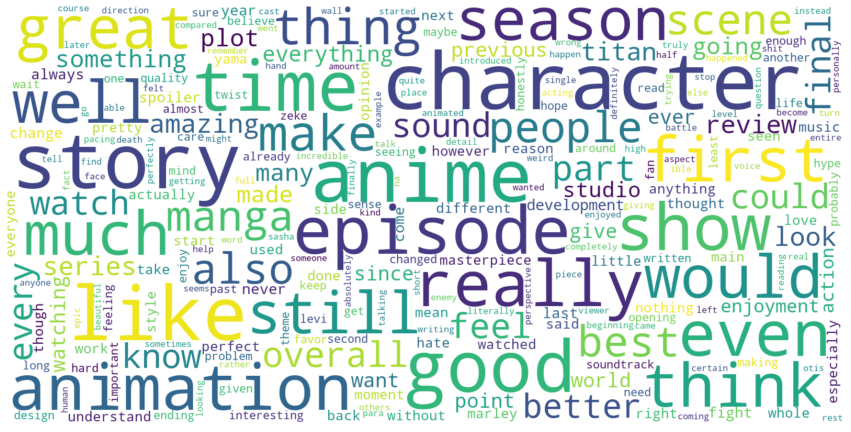

In [68]:
# Inisialisasi Set Untuk Key Kata Dan Value Jumlah Kata
word = {}

# Perulangan Setiap Kata Dan Perhitungannya Dalam Sebuah Dataframe
# Untuk Dimasukkan Kedalam Set
for i in range(len(df)):
    temp_text = df.loc[i]['text']
    temp_split = temp_text.split(' ')
    temp_set = list(set(temp_split))

    for j in range(len(temp_set)):
      try:
        word[temp_set[j]] += 1
      except:
        word[temp_set[j]] = 1

# Menginisialisasi Dan Menampilkan Wordcloud Berdasarkan Frekuensi Kata Dan Menampilkannya
wordcloud = WordCloud(width=1600, height=800, max_words=250, max_font_size=150, background_color='white').generate_from_frequencies(word)

plt.figure(figsize=(15, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Dari hasil wordcloud diatas dapat kita lihat kata-kata yang mendominasi merupakan kata positif seperti : Great, Good, Best, Amazing, dan Masterpiece. Beberapa topik terkait review yang di highlight pada wordcloud diatas adalah terkait Character, Animation, Story, Plot, dan Scene.

### **Masked Word Cloud**

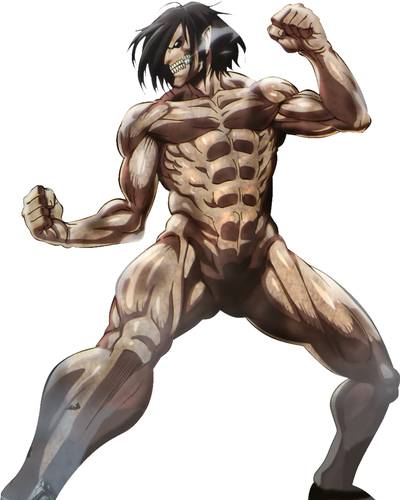

In [69]:
# Menampilkan Gambar Yang Akan Di Masked
img = Image.open('aot.png')
img.resize((400, 500), Image.ANTIALIAS)

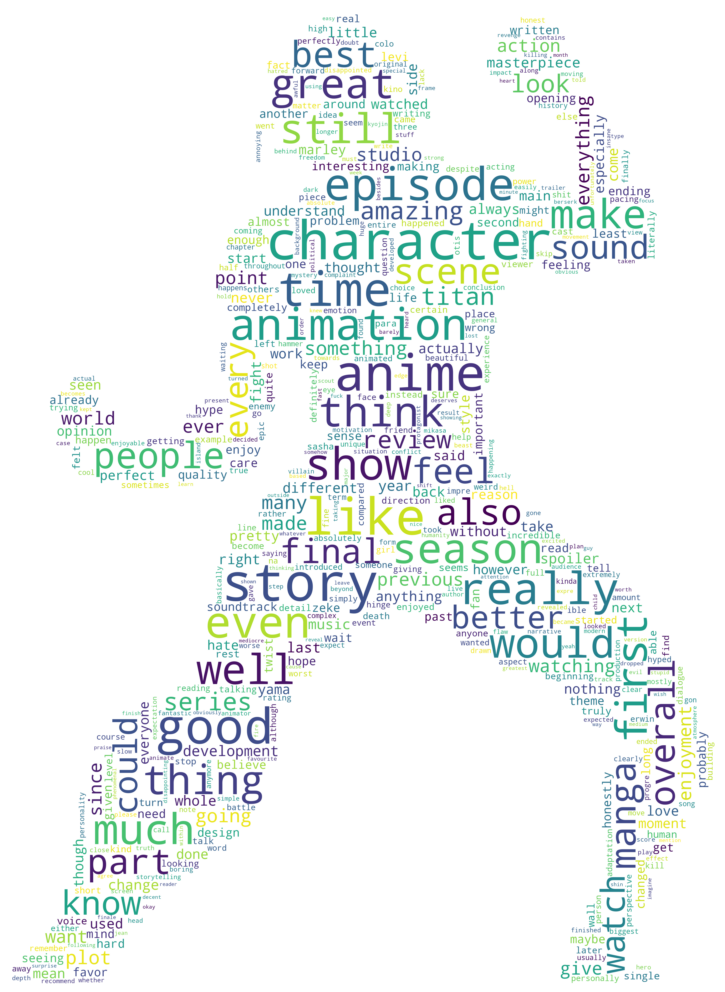

In [70]:
# Generate Wordcloud dari gambar yang akan di mask beserta menampilkannya
mask = np.array(Image.open('aot.png'))
wc = WordCloud(
        mask=mask, background_color="white",
        max_words=500, max_font_size=256,
        width=mask.shape[1],
        height=mask.shape[0]
).generate_from_frequencies(word)
               
plt.figure(figsize=(22, 18))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

### **Top Word Frequency**

In [71]:
sorted_word = dict(sorted(word.items(), key=lambda item: item[1], reverse=True))
sorted_word = pd.DataFrame(sorted_word.items(), columns=['Word', 'Count'])

print(f'Total Data : {len(df)}')
print(f'Total Kata (Unique) : {len(word)}')

sorted_word.head(20)

Total Data : 369
Total Kata (Unique) : 7480


,Word,Count
0,character,299
1,story,289
2,like,274
3,anime,268
4,good,252
5,time,238
6,episode,218
7,show,209
8,really,207
9,animation,205


### **Words Count Distribution**

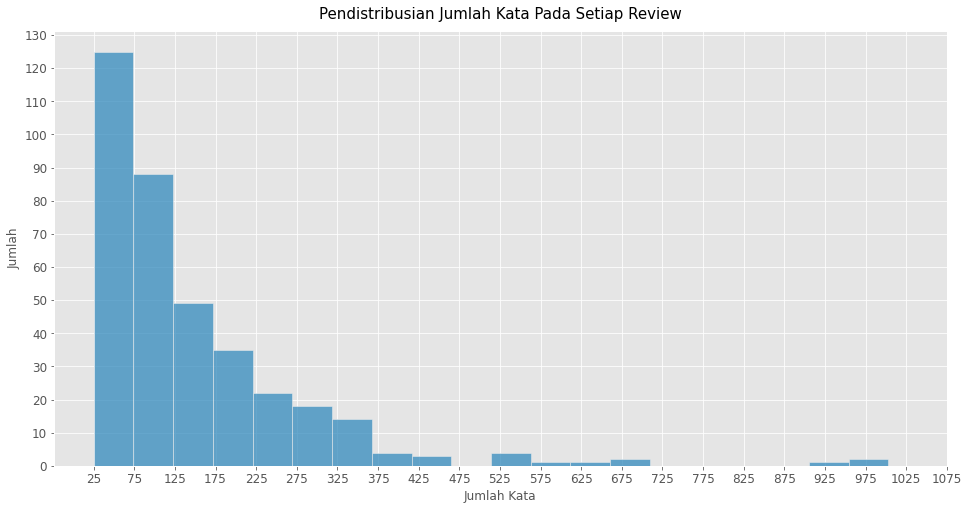

In [72]:
df['word_count'] = df['text'].str.split().str.len()

plt.figure(figsize=(16, 8))
plt.title("Pendistribusian Jumlah Kata Pada Setiap Review", fontsize=15, pad=12)

sns.histplot(x='word_count', data=df, bins=20)
plt.xticks(range(25, 1100, 50))
plt.yticks(range(0, 135, 10))

plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah")
plt.show()

### **Review Date Trends** 

In [73]:
df['date'] = df['created_at'].str[:10]
df_count = df.groupby(by='date').count().reset_index()

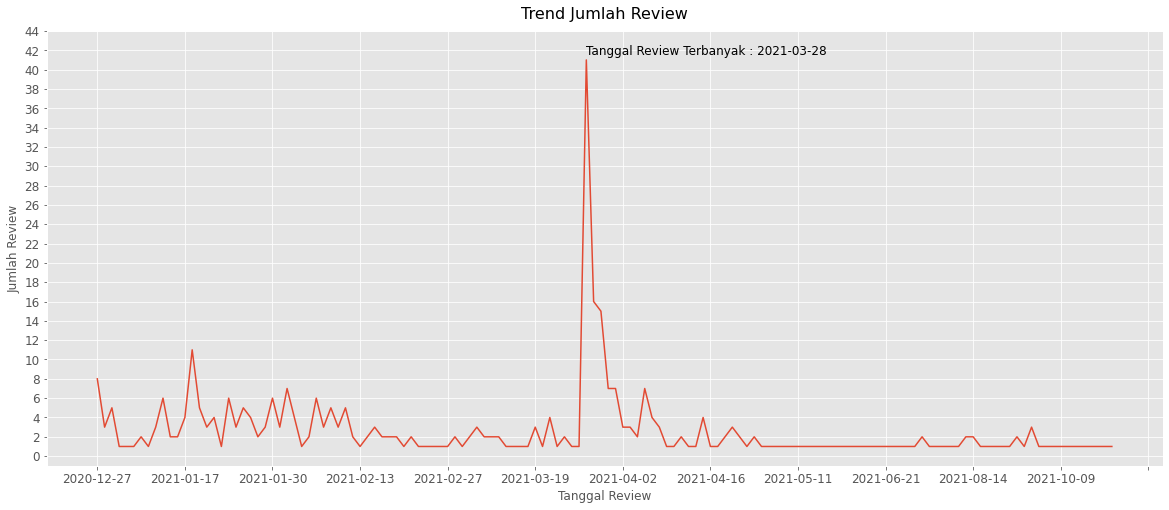

In [74]:
plt.figure(figsize=(20, 8))
plt.title("Trend Jumlah Review", fontsize=16, pad=12)
sns.lineplot(x='date', y='index', data=df_count)

plt.xticks(range(0, 150, 12))
plt.yticks(range(0, 46, 2))

ymax = max(df_count['index'])
xpos = df_count.index[df_count['index'] == ymax][0]
xmax = df_count['date'][xpos]

plt.annotate('Tanggal Review Terbanyak : ' + df_count.iloc[xpos]['date'], xy=(xmax, ymax), xytext=(xmax, ymax+0.5), fontsize=12)
plt.xlabel('Tanggal Review')
plt.ylabel('Jumlah Review')

plt.show()

Dengan berakhirnya seri season final attack on titan (episode 12) pada tanggal 28 Maret 2021 maka review dari para fans melonjak sesuai dengan grafik trend jumlah review diatas.

### **Jumlah Score Berdasarkan Reviewers** 

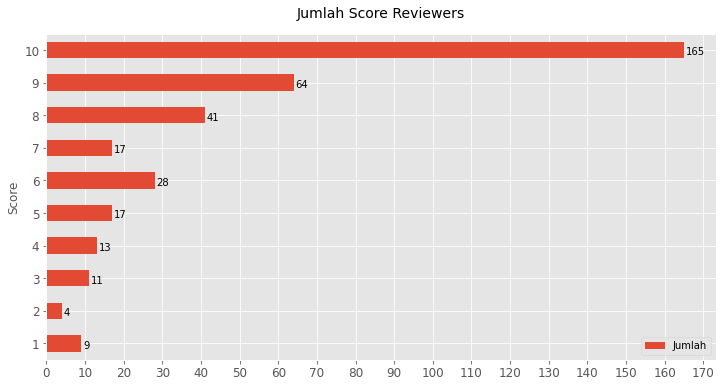

In [75]:
overall_score = df[['overall_score', 'created_at']].rename({'created_at': 'Jumlah'}, axis=1)
overall_score = overall_score.groupby(by=['overall_score']).count()

ax = overall_score.plot(kind='barh', figsize=(12, 6), xlabel='Score', ylabel='Jumlah')
ax.set_xticks(np.arange(0, 180, 10))

for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2 - 0.15
    ax.annotate(p.get_width(), (x, y))

plt.legend(loc='best')
plt.title("Jumlah Score Reviewers", fontsize=14, pad=16)
plt.show()


Berdasarkan hasil kalimat positif yang terlihat secara keseluruhan pada wordcloud dan rating pada grafik diatas dapat disimpulkan bahwa anime Attack on Titan : Final Season memiliki rating yang baik dari para reviewers pada situs MyAnimeList. 